In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline

In [6]:
def load_data_from_file(filename='data/advertising.csv'):
   data = np.genfromtxt(filename, dtype=None, delimiter=',', skip_header=1)
   features_X = data[:, :3]
   sales_Y = data[:, 3]

   features_X = np.hstack([np.ones((features_X.shape[0], 1)), features_X])

   return features_X, sales_Y

In [10]:
#  Question 2 

features_X, _ = load_data_from_file()
print(features_X[:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [11]:
#  Question 3

_ , sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [18]:

def create_random_value(bound=10):
   return random.uniform(-bound / 2, bound / 2)
def create_individual(n=4, bound=10):
   individual = []
   individual = [create_random_value() for _ in range(n)]
   return individual

individual = create_individual()
print(individual)

[-0.23403045847644144, 0.8338203945503118, 4.081128851953352, 0.046868558173902564]


In [19]:
def compute_loss(individual):
   theta = np.array(individual)
   y_hat = features_X @ theta
   loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
   return loss

def compute_fitness(individual):
   loss = compute_loss(individual)
   fitness = 1 / (loss + 1)
   return fitness

In [20]:
#  Question 4

individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
fitness_score

1.0185991537088997e-06

In [21]:
def crossover(individual1, individual2, crossover_rate=0.9):
   individual1_new = individual1.copy()
   individual2_new = individual2.copy()

   for i in range(len(individual1)):
      if random.random() < crossover_rate:
         individual1_new[i] = individual2[i]
         individual2_new[i] = individual1[i]
   return individual1_new, individual2_new

In [22]:
#  Question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [23]:
def mutate(individual, mutation_rate=0.05):
   individual_m = individual.copy()

   for i in range(len(individual)):
      if random.random() < mutation_rate:
         individual_m[i] = create_random_value()

   return individual_m


In [25]:
# Question 6

before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [27]:
def initialize_population(m):
  population = [create_individual() for _ in range(m)]
  return population

def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [28]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # crossover
        individual_t1, individual_t2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_t1)
        individual_m2 = mutate(individual_t2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())

    return new_population, compute_loss(sorted_population[m-1])

In [29]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [35]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initialize_population(m)
  losses_list = []
  for i in range(n_generations):
    population, losses = create_new_population(population, elitism=2, gen=i)
    losses_list.append(losses)

  return losses_list,  population

Best loss: 505.4050437356547 with chromsome:  [-2.0091033322332974, 0.1391627634364232, 0.02446159373400114, 0.47810880324296967]
Best loss: 450.86926759668245 with chromsome:  [-1.8956968080990313, 0.01162330061244532, -0.3310164846835173, 0.9765543497276177]
Best loss: 211.50847866720673 with chromsome:  [-0.5411927768661045, 0.08687681641142841, -0.35563875786233456, 0.5936916467827205]
Best loss: 211.50847866720673 with chromsome:  [-0.5411927768661045, 0.08687681641142841, -0.35563875786233456, 0.5936916467827205]
Best loss: 72.93816481898735 with chromsome:  [4.2459893091391585, 0.030447294285817605, -0.004125011750877761, 0.3468982798201994]
Best loss: 72.93816481898735 with chromsome:  [4.2459893091391585, 0.030447294285817605, -0.004125011750877761, 0.3468982798201994]
Best loss: 56.65696244327943 with chromsome:  [-0.5522553832115253, 0.030447294285817605, -0.004125011750877761, 0.3468982798201994]
Best loss: 47.78413033715965 with chromsome:  [4.2459893091391585, 0.078382716

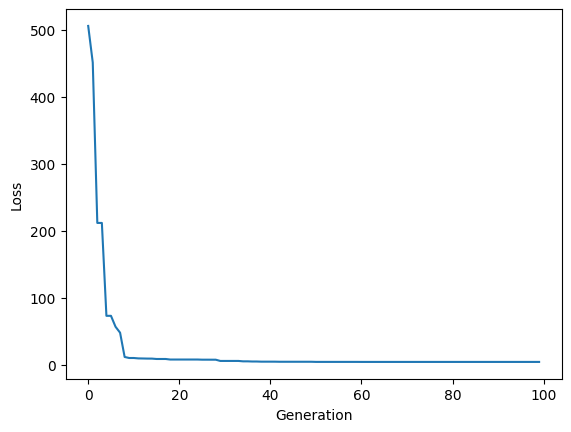

In [38]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
   plt.plot(losses_list)
   plt.xlabel('Generation')
   plt.ylabel('Loss')
   plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

[2.0707025685612575, 0.06723723951466987, 0.10853978079237692, 0.021030319473140935]


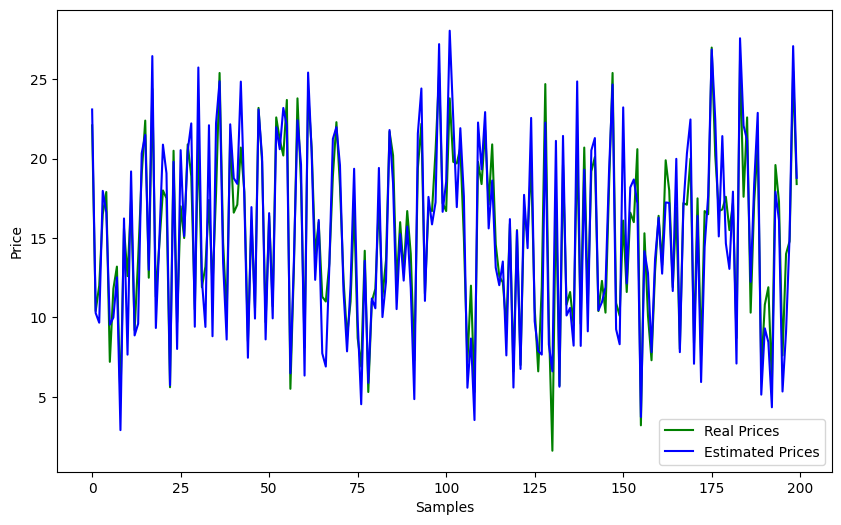

In [39]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     # ************* your code here *************
     estimated_price = sum(c*x for x,c in zip(feature, theta))
     estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()